<a href="https://colab.research.google.com/github/Rajkdea123/Face-Mask-Detection/blob/main/Training_Model_using_Resnet152V2_CNN_Architecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 3762 images belonging to 2 classes.
Found 806 images belonging to 2 classes.
Epoch 1/10
 46/118 [==========>...................] - ETA: 42s - loss: 0.2012 - accuracy: 0.9803

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


118/118 [==============================] - ETA: 0s - loss: 0.2780 - accuracy: 0.9835
Epoch 00001: val_accuracy improved from -inf to 0.96898, saving model to /content/drive/MyDrive/model/resnet.h5


/usr/local/lib/python3.10/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


118/118 [==============================] - 245s 2s/step - loss: 0.2780 - accuracy: 0.9835 - val_loss: 0.5766 - val_accuracy: 0.9690
Epoch 2/10
118/118 [==============================] - ETA: 0s - loss: 0.1717 - accuracy: 0.9934
Epoch 00002: val_accuracy improved from 0.96898 to 0.99628, saving model to /content/drive/MyDrive/model/resnet.h5
118/118 [==============================] - 81s 690ms/step - loss: 0.1717 - accuracy: 0.9934 - val_loss: 0.1516 - val_accuracy: 0.9963
Epoch 3/10
118/118 [==============================] - ETA: 0s - loss: 0.1438 - accuracy: 0.9952
Epoch 00003: val_accuracy did not improve from 0.99628
118/118 [==============================] - 77s 651ms/step - loss: 0.1438 - accuracy: 0.9952 - val_loss: 0.2087 - val_accuracy: 0.9963
Epoch 4/10
118/118 [==============================] - ETA: 0s - loss: 0.1062 - accuracy: 0.9963
Epoch 00004: val_accuracy improved from 0.99628 to 0.99752, saving model to /content/drive/MyDrive/model/resnet.h5
118/118 [==================

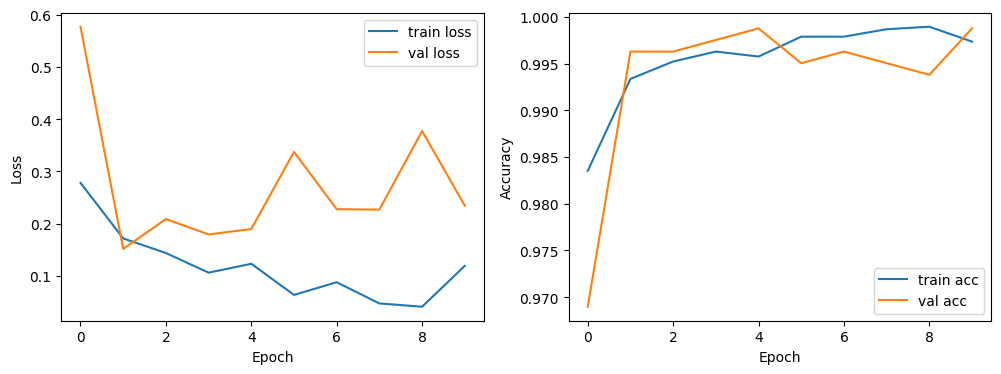

In [ ]:
import datetime
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet_v2 import ResNet152V2
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
tf.random.set_seed(42)

# Set the path for your training and validation data
train_path = "/content/drive/MyDrive/dataset/train"
valid_path = "/content/drive/MyDrive/dataset/valid"

# Set the image size for input to the model
IMAGE_SIZE = [224, 224]

# Create an instance of the ResNet152V2 model
resnet152V2 = ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# Freeze the pre-trained layers
for layer in resnet152V2.layers:
    layer.trainable = False

# Get the number of output classes
folders = glob('/content/drive/MyDrive/dataset/train/*')
num_classes = len(folders)

# Flatten the output of the ResNet152V2 model
x = Flatten()(resnet152V2.output)

# Add a fully connected layer with softmax activation for classification
prediction = Dense(num_classes, activation='softmax')(x)

# Create the model
model = Model(inputs=resnet152V2.input, outputs=prediction)

# Compile the model
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

# Use data augmentation for the training set and rescaling for the validation set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator(rescale=1./255)

# Generate batches of augmented data for training and validation sets
batch_size = 32
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

# Set up a checkpoint to save the best model
model_path = 'be
'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# Train the model
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=10,
    steps_per_epoch=len(train_generator),
    validation_steps=len(valid_generator),
    callbacks=callbacks_list
)

# Save the model
model.save('/content/drive/MyDrive/My ML Project/DL Project/CNN/mask detection/model/last_resnet152v2.h5')

# Plot the loss and accuracy curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
